In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 그래프 출력을 위한 코드
%matplotlib inline

In [3]:
stock = pd.read_csv("Samsung Electronics Stock Price.csv.csv")
BaseRate = pd.read_csv("KoreaCentralBankBaseRate.csv")

In [4]:
# head()를 사용하여 출력.
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,39400.0,39400.0,38550.0,38750.0,34697.894531,7847664
1,2019-01-03,38300.0,38550.0,37450.0,37600.0,33668.164062,12471493
2,2019-01-04,37450.0,37600.0,36850.0,37450.0,33533.843750,14108958
3,2019-01-07,38000.0,38900.0,37800.0,38750.0,34697.894531,12748997
4,2019-01-08,38000.0,39200.0,37950.0,38100.0,34115.875000,12756554


In [5]:
print(stock.columns)
print("-----------------------")
print(stock.index)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
-----------------------
RangeIndex(start=0, stop=1003, step=1)


In [23]:
BaseRate.head()

,date,BaseRate,ChangeRate
0,2017.01.13,1.25,0.0
1,2017.02.23,1.25,0.0
2,2017.05.25,1.25,0.0
3,2017.05.25,1.25,0.0
4,2017.07.13,1.25,0.0


In [6]:
print(BaseRate.columns)
print("-----------------------")
print(BaseRate.index)

Index(['date', 'BaseRate', 'ChangeRate'], dtype='object')
-----------------------
RangeIndex(start=0, stop=50, step=1)


In [7]:
# 데이터 전처리
# 필요없는 열 잘라주기
stock = stock.drop(['Open', 'Close', 'Adj Close', 'Volume'], axis=1)
stock.head()

,Date,High,Low
0,2019-01-02,39400.0,38550.0
1,2019-01-03,38550.0,37450.0
2,2019-01-04,37600.0,36850.0
3,2019-01-07,38900.0,37800.0
4,2019-01-08,39200.0,37950.0


In [8]:
BaseRate = BaseRate.drop(['ChangeRate'], axis=1)
BaseRate.head()

,date,BaseRate
0,2017.01.13,1.25
1,2017.02.23,1.25
2,2017.05.25,1.25
3,2017.05.25,1.25
4,2017.07.13,1.25


In [9]:
# 2019년 이전 데이터는 필요없어서 행 자르기.
BaseRate = BaseRate.drop(np.arange(16))
BaseRate.head()

,date,BaseRate
16,2019.01.24,1.75
17,2019.02.28,1.75
18,2019.04.18,1.75
19,2019.05.31,1.75
20,2019.07.18,1.50


In [10]:
stock['Mean'] = stock['High'] + stock['Low'] / 2
stock.head()

,Date,High,Low,Mean
0,2019-01-02,39400.0,38550.0,58675.0
1,2019-01-03,38550.0,37450.0,57275.0
2,2019-01-04,37600.0,36850.0,56025.0
3,2019-01-07,38900.0,37800.0,57800.0
4,2019-01-08,39200.0,37950.0,58175.0


In [11]:
# 주식 데이터 High, Low 열 자르기
stock = stock.drop(['High', 'Low'], axis=1)
stock.head()

,Date,Mean
0,2019-01-02,58675.0
1,2019-01-03,57275.0
2,2019-01-04,56025.0
3,2019-01-07,57800.0
4,2019-01-08,58175.0


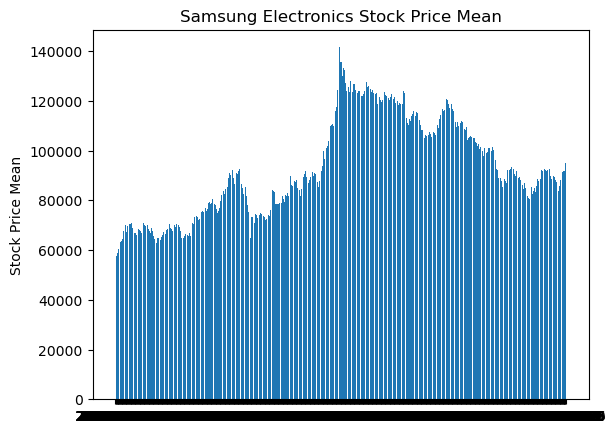

In [13]:
# 그래프 생성, 금리는 꺾은선그래프, 주식은 막대로 표현
x = stock['Date']
y = stock['Mean']
plt.bar(x, y)
plt.ylabel('Stock Price Mean')
plt.title("Samsung Electronics Stock Price Mean")
plt.show()

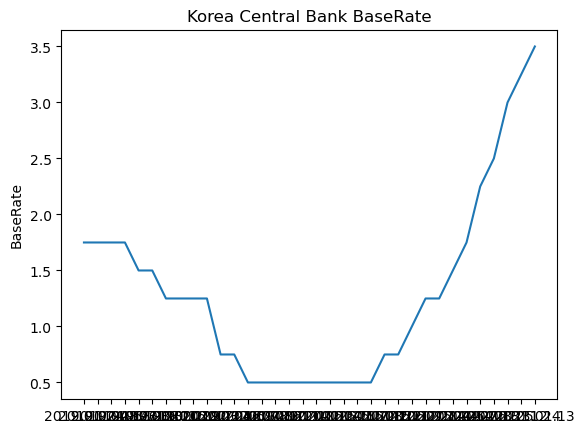

In [14]:
X = BaseRate['date']
Y = BaseRate['BaseRate']
plt.plot(X, Y)
plt.ylabel("BaseRate")
plt.title("Korea Central Bank BaseRate")
plt.show()